## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
from glob import glob
import pickle


sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils_final, file_utils, rna_seq_utils

In [2]:
full_filtered_df = pd.read_csv('../../active_fastas/rna_seq.csv')
full_filtered_norm_df = rna_seq_utils.normalize_expression_per_gene(full_filtered_df)
full_filtered_norm_df = rna_seq_utils.ari_mean_df_of_duplicates(full_filtered_norm_df)

num_genes = full_filtered_df.shape[0]
num_genes

23112

In [3]:
df = rna_seq_utils.ari_mean_df_of_duplicates(full_filtered_df.loc[full_filtered_df['TTHERM_ID'] == 'TTHERM_00092820'])

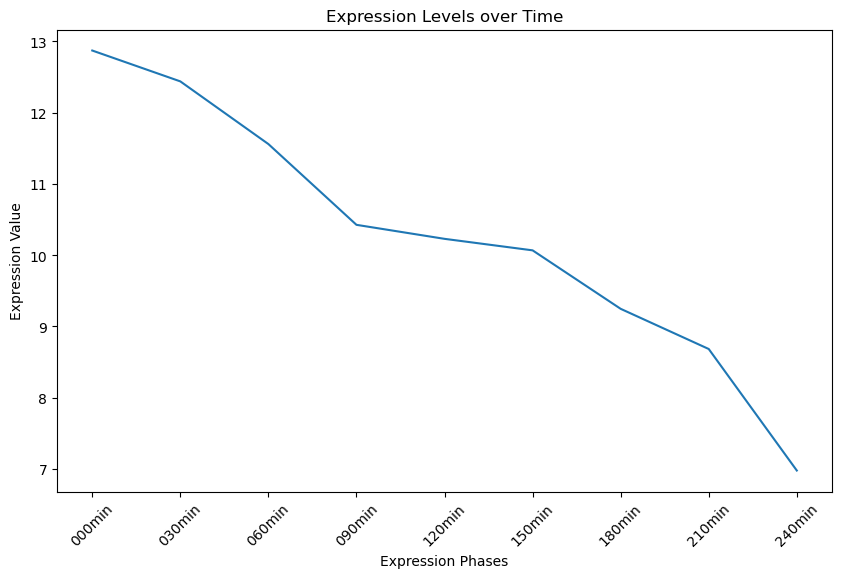

In [4]:
phases = list(df.columns)[1:]
expression_values = [df[col].values[0] for col in list(df.columns)[1:]]

plt.figure(figsize=(10, 6))  

plt.plot(phases, expression_values, linestyle='-')

plt.xlabel("Expression Phases")
plt.ylabel("Expression Value")
plt.title("Expression Levels over Time")

plt.xticks(rotation=45)

plt.show()

In [5]:
[full_filtered_norm_df[col].max() for col in full_filtered_norm_df.columns]

['TTHERM_06324284',
 1.4976299889259195,
 1.4960227900038257,
 1.4938467586222846,
 1.4804692591787965,
 1.4990086781291643,
 1.4971596605347086,
 1.495848069828609,
 1.4960740325294446,
 1.4994344357907883]

In [6]:
full_filtered_norm_df.sample(10)

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
7060,TTHERM_00310750,1.126384,0.560824,0.555123,0.424340,0.559263,0.810236,0.397605,0.362030,0.285055
13337,TTHERM_00574280,0.770915,0.830889,0.695523,0.731732,0.828131,1.244259,0.622267,0.472421,0.213346
6486,TTHERM_00290670,0.581055,0.476954,0.271747,0.206633,0.150389,0.061164,0.080912,0.124261,0.211921
6999,TTHERM_00309990,0.127217,0.174966,0.428538,0.722039,0.961787,0.882882,0.637137,0.470706,0.263379
10378,TTHERM_00449750,0.047237,0.022747,0.033859,0.179155,0.490223,0.826956,0.900082,0.854955,0.431228
4658,TTHERM_00196390,0.616931,0.563287,0.795541,0.729490,0.859571,1.078214,0.532931,0.187805,0.074021
12338,TTHERM_00530165,0.864539,1.130776,0.327190,0.577243,0.559059,0.624749,0.749285,0.816477,0.773880
8954,TTHERM_00392760,0.178289,0.687100,0.773882,0.481157,0.230167,0.099260,0.316016,0.584262,0.833272
16537,TTHERM_00722980,0.247187,0.350522,0.610143,0.801517,0.367877,0.847218,0.406080,1.495038,1.319773
530,TTHERM_00030050,1.280062,0.843813,0.219994,0.249097,0.619195,0.738393,0.899103,0.952973,0.950592


In [7]:
# averaged_full_filtered_norm_df = rna_seq_utils.ari_mean_df_of_duplicates(full_filtered_norm_df)

# cycle_expression_conflict_df = averaged_full_filtered_norm_df.loc[
#     (averaged_full_filtered_norm_df['000min'] > 0.9)
#     &
#     (averaged_full_filtered_norm_df['210min'] < 0.1)
#     &
#     (averaged_full_filtered_norm_df['240min'] < 0.1)
# ]

# cycle_expression_conflict_df.to_csv('./cycle_expression_conflict.csv')

### LEIDEN CLUSTERING

In [8]:
phases = 'rna_seq'

In [9]:
metric = 'manhattan'
# metric='minkowski_3.0'

resolution_param=0.005
# resolution_param=0.006
# resolution_param=0.007
# resolution_param=0.010
# resolution_param=0.050
# resolution_param=0.1

n_neighbors = 3

dataset = 'rna_seq'

In [10]:
full_filtered_norm_df.head()

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
0,TTHERM_00000010,0.689849,0.536514,0.124665,0.083297,0.074211,0.106558,0.121777,0.165992,0.172445
1,TTHERM_00000020,0.247586,0.201844,0.430601,0.246893,0.376813,0.148786,0.428617,0.689500,1.149059
2,TTHERM_00000030,0.132025,0.000000,0.070043,0.107038,0.079857,0.051645,0.134962,0.058858,0.097810
3,TTHERM_00000040,1.000000,0.255016,0.553215,0.783375,1.050091,1.101390,1.049571,0.587980,0.626600
4,TTHERM_00000047,0.019566,0.071793,0.163145,0.483365,0.822495,0.848367,0.698907,0.567771,0.232808


In [11]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df, 
    dataset,
    metric=metric, 
    n_neighbors=n_neighbors, 
    resolution_param=resolution_param, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [12]:
leiden_label_df_round_1_arranged = bokeh_ui_utils_final.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./rna_seq_label_df_round_1.csv', index=False)

In [13]:
avg_full_filtered_norm_df = clustering_utils.ari_mean_nexpr_per_mod(full_filtered_norm_df, leiden_label_df_round_1_arranged_sorted)

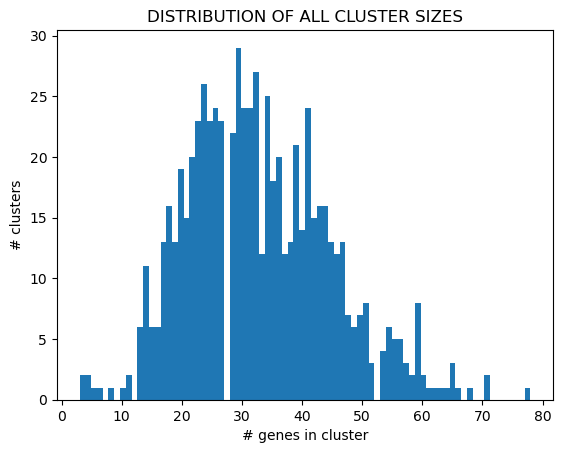

In [14]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

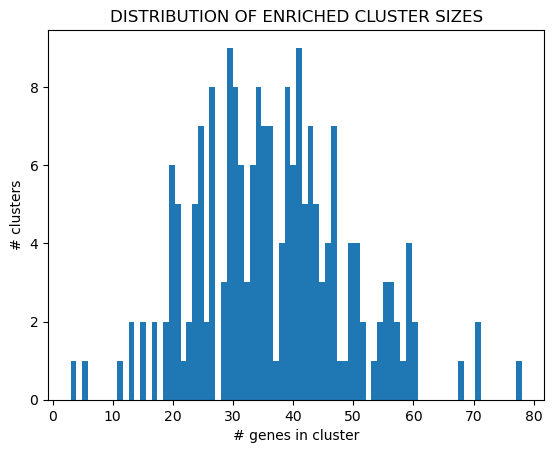

In [15]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [16]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.04266493252697221
                  modularity: 0.7948986162730997
                   nclusters: 702
           mean_cluster_size: 32.92307692307692
         median_cluster_size: 31.0
             sd_cluster_size: 11.958132456328023
          nenriched_clusters: 197
  mean_enriched_cluster_size: 36.756345177664976
median_enriched_cluster_size: 36.0
    sd_enriched_cluster_size: 12.537923096601121
     nenriched_cluster_genes: 7241
                    datetime: 2024-06-28 09:50:00.012359


In [17]:
enrich_full_nn3 = clustering_utils.compute_enrichment(leiden_label_df_round_1_arranged_sorted)

In [18]:
outfile='../enrichment/rna_seq_full_enrichment.csv'
enrich_full_nn3.to_csv(outfile, index=False)

In [19]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

In [20]:
palette45 = """
#51635F\n#FF1C16\n#16FC26\n#403DFC\n#FE0DCE\n#F9AA00\n#00FFD5\n#22BFFE\n#BB3551\n#E6FE97\n#ECADFF\n#FFBFBD\n#CF00F5\n#0D8B00\n#D7FEFF\n#8D7200\n#F76C00\n#AD3288\n#5C5AB8\n#FC0080\n#B8FF16\n#00AAB4\n#FBE11C\n#9AAAD9\n#8BBB8C\n#934B47\n#6EFE99\n#9C6D91\n#FB9778\n#9D32AF\n#D40087\n#FFDC9D\n#FF8DB6\n#A96AFC\n#FDDDFB\n#168CF7\n#FD6CF9\n#F64553\n#4D6A00\n#FAFEDB\n#A7977D\n#0DFBFF\n#86B80D\n#FD8AE4\n#B7B126
""".split()

palette32 = """
white\n#F91622\n#16FC0D\n#5138FB\n#FD00CF\n#FDD51C\n#16FDD7\n#FC8B8E\n#16BFFF\n#DF9BFD\n#669C2A\n#FEE7C4\n#F31685\n#DF16FD\n#C1F1FE\n#A23D7E\n#D5FD0D\n#8C5A0D\n#FC790D\n#4F5CBC\n#FFCBEF\n#168D72\n#68FA93\n#C4FDC9\n#F7A449\n#16789B\n#AD0DAB\n#C4262E\n#0DF1FF\n#EFF994\n#B6C1FE\n#8F22CD
""".split()

palette35 = """
#585F6A\n#FE1626\n#00FB0D\n#2E40FC\n#FD0DCE\n#FCD200\n#F7868C\n#16FFDC\n#22BEFB\n#D28EF6\n#609000\n#FFE7C9\n#F51683\n#FF730D\n#CAFE16\n#AA3586\n#BEEEFD\n#BD00FA\n#895D22\n#FEC7F0\n#495AA1\n#73F995\n#229270\n#ED963B\n#F6FE97\n#C5FFD0\n#C50DC8\n#6993FF\n#C22A35\n#16ECFC\n#AA707E\n#7A3BCB\n#7C845C\n#358FAA\n#BDBAF6
""".split()

palette38 = """
#636265\n#F60D16\n#00F90D\n#3540FB\n#FD0DD0\n#FDDB0D\n#00FFE2\n#FA8884\n#2ABEFE\n#E5A3FF\n#518F00\n#FEFDD5\n#D51CFF\n#ED007F\n#A33879\n#96731C\n#C8FB16\n#C0ECFE\n#FBC1DA\n#5658BA\n#F96900\n#F69F1C\n#58FA9C\n#008E72\n#BA22B9\n#167D97\n#794D8A\n#CEFE9C\n#BB222E\n#954D45\n#00DCEF\n#FD66B0\n#B2FDD3\n#FDBD9F\n#A9B4F1\n#B371FE\n#849566\n#2A8EFF
""".split()

palette64 = """
white\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

palette65 = """
white\ngainsboro\n#FA002E\n#22FC22\n#221CFA\n#FF3DD6\n#FFDA00\n#00FEFB\n#F48684\n#CEB4FE\n#FFFFE5\n#0D933D\n#CC00F8\n#800D5D\n#F10084\n#22267A\n#0DADFF\n#CBFD71\n#9A761C\n#F96C00\n#6399A6\n#FFBCDA\n#8D0DA3\n#F79F26\n#00FFBF\n#A37CFB\n#F68EEB\n#720D0D\n#F163AA\n#7E926A\n#826386\n#B41C32\n#9BEBCE\n#E2DB83\n#56D4FA\n#E6E2FB\n#925D58\n#F7C3A7\n#62E970\n#220DBD\n#5583BB\n#7EA01C\n#CDFDB6\n#FD00FB\n#B30D97\n#F5FF00\n#DD77FD\n#4282FC\n#BBA6A4\n#0D8068\n#AB5F26\n#F7C26E\n#9EFE00\n#9B2EFD\n#C56887\n#FD3D68\n#ABF2FD\n#835FAC\n#FF16B1\n#325371\n#CA16CA\n#D26322\n#AFCFFE\n#91A1FA\nfloralwhite
""".split()

In [21]:
palette36 = ["#FFFFFF", 
             "#E4E1E3", 
             "#F6222E", 
             "#FE00FA", 
             "#16FF32", 
             "#3283FE", 
             "#FEAF16", 
             "#B00068", 
             "#1CFFCE",
             "#90AD1C", 
             "#2ED9FF", 
             "#DEA0FD", 
             "#AA0DFE", 
             "#F8A19F", 
             "#325A9B", 
             "#C4451C", 
             "#1C8356", 
             "#85660D",
             "#B10DA1", 
             "#FBE426", 
             "#1CBE4F", 
             "#FA0087", 
             "#FC1CBF", 
             "#F7E1A0", 
             "#C075A6", 
             "#782AB6", 
             "#AAF400",
             "#BDCDFF", 
             "#822E1C", 
             "#B5EFB5", 
             "#7ED7D1", 
             "#1C7F93", 
             "#D85FF7", 
             "#683B79", 
             "#66B0FF", 
             "#3B00FB",
             "magenta"]

change index 5 to #778899. Change index 9 to #2F4F4F. Add #FF7F50. Change index 9 to #FFBCD9. Change index 14 to #DEA5A4

In [22]:
palette27 = ["#FFFFFF", 
             "#AA0DFE", 
             "#3283FE", 
             "#85660D", 
             "#782AB6", 
             "#778899", 
             "#1C8356", 
             "#16FF32", 
             "#F7E1A0", 
#              "#2F4F4F",
             "#FFBCD9", 
             "#C4451C", 
             "#DEA0FD", 
             "#FE00FA", 
#              "#325A9B", 
             "#FEAF16", 
             "#DEA5A4", 
             "#90AD1C", 
             "#F6222E",
             "#1CFFCE", 
             "#2ED9FF", 
             "#B10DA1", 
#              "#C075A6", 
#              "#FC1CBF", 
#              "#B00068", 
             "#FBE426", 
             "#FA0087",
             "#FF7F50"
            ]

In [23]:
with open(('colors_2000_1'), 'rb') as file:
    color_palette_raw = pickle.load(file)

color_palette = palette65

if len(color_palette_raw) >= max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1:
    color_palette = color_palette_raw[:max(leiden_label_df_round_1_arranged_sorted['label'].unique()) + 1]

In [24]:
# yf_to_ttherm_map_df = pd.read_csv('../../new_raw_data/tgd2024/yf_ttherm_mapping_may2024.csv')
# yf_to_ttherm_map_df.rename(columns={'TTHERM_ID': 'TTHERM_IDs', 'YF_ID': 'TTHERM_ID'},inplace=True)
yf_to_ttherm_map_df = None

In [25]:
import os

embedding_metric = 'manhattan'

In [26]:
full_filtered_norm_df.shape

(23112, 10)

In [27]:
leiden_label_df_round_1_arranged_sorted.shape

(23112, 2)

In [28]:
complete_annot.shape

(26686, 25)

In [29]:
dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=['rna_seq', 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

p = bokeh_ui_utils_final.generate_and_save_umap(dashboard_path, full_filtered_norm_df, enrich_full_nn3, complete_annot, leiden_label_df_round_1_arranged_sorted, 'rna_seq', color_palette, os.path.basename(dashboard_path), expr_min=0, expr_max=1, embedding_metric=embedding_metric, n_neighbors=n_neighbors, yf_to_ttherm_map_df=yf_to_ttherm_map_df, avg_df=avg_full_filtered_norm_df)

/opt/anaconda3/envs/tgne_all.env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/envs/tgne_all.env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/michaelbertagna/git/TGNE-2022/TGNE/embedding/../../utils/bokeh_ui_utils_final.py:612: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_df['module'] = hover_data['module'].va


            // console.log(plot_tabs.active);
            if (plot_tabs.active == 0){
            var avg_idxs = cb_obj.indices;
            var d1 = s1.data; // embedding
            var d2 = s2.data; // table
            var d_avg = s_avg.data

            var d_expr = s_expr.data; // expression plot
            var d_hm = s_hm.data; // heatmap
            var d_enrich = s_enrich.data; // enrichment plot

            var selected_ttherm_id = "";

            var ttids = d_hm['TTHERM_ID'].slice(0, 23112);
            const num_cols = cols.length;

            d2['module'] = []
            d2['ID'] = []


            // JS INITIALIZE

            // EMBEDDING
            // Start by making everything tiny and pale
            // d1['alpha'] = Array(d1['ID'].length).fill(0.01)
            // d1['line_alpha'] = Array(d1['ID'].length).fill(0.01)
            // d1['radius'] = Array(d1['ID'].length).fill(0.0001)

            // TABLE
            d2['ID'] = []
            // d2['YF_ID'] = [

In [30]:
# dashboard_path = file_utils.generate_uniquely_numbered_export_path('./plots/', 'dashboard', '.html', tags=['rna_seq', 'umap', metric, f'{n_neighbors}nn', f'{resolution_param}rp'])

# p = bokeh_ui_utils_final.generate_and_save_mds(dashboard_path, full_filtered_norm_df, complete_annot, leiden_label_df_round_1_arranged_sorted, 'rna_seq', color_palette, os.path.basename(dashboard_path), expr_min=-3, expr_max=3, embedding_metric=embedding_metric, n_neighbors=n_neighbors, yf_to_ttherm_map_df=yf_to_ttherm_map_df)

In [31]:
# (HH2A.1, HH2A.2, HH2B.1, HH2B.2, HH3, HH4.1, and HH4.2)
HHs = [
"TTHERM_00189170", "TTHERM_00143660", "TTHERM_00633360", "THERM_00283180", 
]

# (Figure 3A; CPD1, CPD2, and CPG3 and SMC2 and SMC4).
CPD_CPG_SMC = [
"TTHERM_00486070", "TTHERM_00392760", "TTHERM_00919690", "TTHERM_00812950", "TTHERM_0044640", 
]

# cyclin D family members, CYC4, CYC13, and CYC25
cyclin_D_family_members = [
"TTHERM_01043080", "TTHERM_01128530", "TTHERM_00717540",
]

# all cyclins
cyclins = [
'TTHERM_00196590',
'TTHERM_00433390',
'TTHERM_00526250',
'TTHERM_00962160',
'TTHERM_01128530',
'TTHERM_00189230',
'TTHERM_00425970',
'TTHERM_00780580',
'TTHERM_00693080',
'TTHERM_00827080',
'TTHERM_00698650',
'TTHERM_00079530',
'TTHERM_00624450',
'TTHERM_00784350',
'TTHERM_00933270',
'TTHERM_00732460',
'TTHERM_00842480',
'TTHERM_00717540',
'TTHERM_00066840',
'TTHERM_000576939',
'TTHERM_00082190',
'TTHERM_00649450',
'TTHERM_00180970',
'TTHERM_00726380',
'TTHERM_00013060',
'TTHERM_00049420',
'TTHERM_00294860',
'TTHERM_00535270',
'TTHERM_01043080',
'TTHERM_00192000',
'TTHERM_00194440',
'TTHERM_00293270',
'TTHERM_00332170',
'TTHERM_00940290',
]

cyc_subset = [
'TTHERM_00196590', # CYC1 
'TTHERM_00425970', # CYC15
'TTHERM_00624450', # CYC20
'TTHERM_00842480', # CYC24
'TTHERM_00194440', # CYC6
'TTHERM_00332170', # CYC8
]

all_cdks = [
'TTHERM_00411810', #	CDK1
'TTHERM_00318700', #	CDK10
'TTHERM_00576780', #	CDK11
'TTHERM_00267860', #	CDK13
'TTHERM_00394590', #	CDK14
'TTHERM_01035490', #	CDK15
'TTHERM_00624260', #	CDK16
'TTHERM_00066860', #	CDK17
'TTHERM_00784290', #	CDK18
'TTHERM_00339880', #	CDK19
'TTHERM_01347900', #	CDK20
'TTHERM_000837979', #	CDK21
'TTHERM_000937671', #	CDK22
'TTHERM_00011670', #	CDK3
'TTHERM_00286770', #	CDK4
'TTHERM_01080600', #	CDK5
'TTHERM_00837980', #	CDK6
'TTHERM_00133750', #	CDK7
'TTHERM_00717780', #	CDK8
'TTHERM_00185770', #	CDK9
'TTHERM_00483640', #	TCDK3
]

nucleic_acid_metabolic_process = [
'TTHERM_00046490',
'TTHERM_00535470',
'TTHERM_00312260',
'TTHERM_01079170',
'TTHERM_000378989',
'TTHERM_00825460',
'TTHERM_00298220',
'TTHERM_00684490',
'TTHERM_00433640',
'TTHERM_00787360',
'TTHERM_00112560',
'TTHERM_00561799',
'TTHERM_00723610',
'TTHERM_00794250',
]

telomere_maintenance = [
'TTHERM_000378989',
'TTHERM_00433640',
'TTHERM_00112560',
'TTHERM_00561799',
]

# DECENT
mitotic_nuclear_division = [
'TTHERM_00486070',
'TTHERM_00919690',
'TTHERM_00728870',
'TTHERM_00540340',
'TTHERM_00554600',
'TTHERM_01299730',
'TTHERM_00118700',
'TTHERM_00079520',
'TTHERM_00046490',
'TTHERM_00624870',
'TTHERM_000191179',
'TTHERM_00393260',
'TTHERM_00444760',
'TTHERM_00498210',
]

mitotic_cell_cycle = [
'TTHERM_00486070',
'TTHERM_00919690',
'TTHERM_00728870',
'TTHERM_00540340',
'TTHERM_00554600',
'TTHERM_01299730',
'TTHERM_00118700',
'TTHERM_00079520',
'TTHERM_00046490',
'TTHERM_00624870',
'TTHERM_000191179',
'TTHERM_00393260',
'TTHERM_00444760',
'TTHERM_00498210',
]

chromosome_organization = [
'TTHERM_00088010',
'TTHERM_00307700',
'TTHERM_00486070',
'TTHERM_00919690',
'TTHERM_00728870',
'TTHERM_00540340',
'TTHERM_00554600',
'TTHERM_01299730',
'TTHERM_00189170',
'TTHERM_00790790',
'TTHERM_00316500',
'TTHERM_00143660',
'TTHERM_00633360',
'TTHERM_00283180',
'TTHERM_00316410',
'TTHERM_00393260',
'TTHERM_00444760',
'TTHERM_00455130',
'TTHERM_000378989',
'TTHERM_00726370',
'TTHERM_00684490',
'TTHERM_00433640',
'TTHERM_00787360',
'TTHERM_00112560',
'TTHERM_00561799',
]

DNA_repair = [
'TTHERM_00307700',
'TTHERM_00046490',
'TTHERM_00624870',
'TTHERM_000191179',
'TTHERM_00312260',
'TTHERM_00316410',
'TTHERM_00439320',
'TTHERM_01050440',
'TTHERM_01079170',
'TTHERM_01106120',
'TTHERM_00726470',
'TTHERM_00455309',
'TTHERM_00825460',
'TTHERM_00726370',
'TTHERM_00142290',
'TTHERM_00684490',
'TTHERM_00433640',
'TTHERM_00561799',
'TTHERM_00723610',
'TTHERM_00888060',
'TTHERM_00864890',
'TTHERM_00829440',
'TTHERM_00794250',
]

microtubule_cytoskeleton_organi = [
'TTHERM_00335970',
'TTHERM_00426160',
'TTHERM_01220340',
'TTHERM_00522990',
'TTHERM_00338260',
'TTHERM_000727749',
'TTHERM_000123789',
'TTHERM_000161298',
'TTHERM_00030040',
'TTHERM_000357129',
'TTHERM_00046500',
'TTHERM_000488189',
'TTHERM_000706399',
'TTHERM_00088040',
'TTHERM_00133700',
'TTHERM_00266668',
'TTHERM_00346790',
'TTHERM_00452020',
'TTHERM_00493000',
'TTHERM_00755750',
'TTHERM_00842510',
'TTHERM_00992710',
]

# all MCMs
all_MCMs = [
'TTHERM_00554270',
'TTHERM_00092850',
'TTHERM_00277550',
'TTHERM_00069420',
'TTHERM_00448570',
'TTHERM_00011740',
'TTHERM_01031060',
'TTHERM_00703910',
'TTHERM_01207610',
]

MCM_subset = ['YF00026324.1', 'YF00025215.1', 'YF00018584.1', 'YF00012156.1']
# YF00026324, YF00025215, YF00018584, YF00012156
# MCM5, MCM6, MCM3, MCM2

mucocyst_cluster = [
'YF00036312.t1',
'YF00012829.t1',
'YF00000889.t1',
'TTHERM_00527180',
'TTHERM_00335830',
'YF00012830.t1',
'YF00009126.t1',
'YF00005954.t1',
'YF00005804.t1',
'TTHERM_01055600',
'TTHERM_00624720',
] # TTHERM_00630470: mucocyst gene with drastically different expression profile

histones = ['TTHERM_00146340', 'TTHERM_00446570', 'TTHERM_00498190', 'TTHERM_00189170', 'TTHERM_00189180', 'TTHERM_00016170', 'TTHERM_00016200', 'TTHERM_00790790', 'TTHERM_00316500', 'TTHERM_00143660', 'TTHERM_01079200', 'TTHERM_00633360', 'TTHERM_00283180', 'TTHERM_00354710', 'TTHERM_00474790', 'TTHERM_00852840', 'TTHERM_01194650']

In [32]:
gene_lists = {}
gene_lists = {
'HHs': HHs,
'CPD_CPG_SMC': CPD_CPG_SMC,
'cyclin_D_family_members': cyclin_D_family_members,
'cyclins': cyclins,
'cyc_subset': cyc_subset,
'all_cdks': all_cdks,
'nucleic_acid_metabolic_process': nucleic_acid_metabolic_process,
'telomere_maintenance': telomere_maintenance,
'mitotic_nuclear_division': mitotic_nuclear_division,
'mitotic_cell_cycle': mitotic_cell_cycle,
'chromosome_organization': chromosome_organization,
'DNA_repair': DNA_repair,
'microtubule_cytoskeleton_organi': microtubule_cytoskeleton_organi,
'all_MCMs': all_MCMs,
'MCM_subset': MCM_subset,
'mucocyst_cluster': mucocyst_cluster,
'histones' : histones,
}

In [33]:
xls_files = glob('../../new_raw_data/rna_seq_processed/xls_files/*.xls')
sorted(xls_files)

['../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s01.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s02.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s03.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s04.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s05.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s06.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s07.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s08.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s09.xls',
 '../../new_raw_data/rna_seq_processed/xls_files/mc-e22-08-0326-s10.xls']

In [34]:
for xls_file in xls_files:
    excel_file = pd.read_excel(xls_file, sheet_name=None)
    for sheet_name, df in excel_file.items():
        target_ids = []
        gene_cluster_assignments_mode_only = None

        first_column = list(df.iloc[:, 0].values)

        if sheet_name in gene_lists:
            name_num = 0
            new_sheet_name = sheet_name
            while new_sheet_name in gene_lists:
                name_num += 1
                new_sheet_name = f'{sheet_name}_{name_num}'
            print(f'WARNING: DUPLICATE GENE LIST NAME: \'{sheet_name}\'. RENAMING TO \'{new_sheet_name}\'.')
            sheet_name = new_sheet_name

        gene_lists[sheet_name] = first_column

In [35]:
fraction_threshold = 0.1

clustering_utils.multi_fraction_max_same_cluster_genes(gene_lists, leiden_label_df_round_1_arranged_sorted, fraction_threshold=fraction_threshold, print_mode=True)

GENE_LIST: HHs
2 / 2 = 1.0
             TTHERM_ID  label
14534  TTHERM_00633360    402
4253   TTHERM_00189170    402
TTHERM_00633360,TTHERM_00189170



GENE_LIST: CPD_CPG_SMC
1 / 1 = 1.0
             TTHERM_ID  label
19047  TTHERM_00919690    407
TTHERM_00919690



GENE_LIST: cyclin_D_family_members
1 / 1 = 1.0
             TTHERM_ID  label
16411  TTHERM_00717540    323
TTHERM_00717540



GENE_LIST: cyclins
1 / 10 = 0.1
             TTHERM_ID  label
16802  TTHERM_00732460     72
TTHERM_00732460



GENE_LIST: cyc_subset
1 / 1 = 1.0
            TTHERM_ID  label
4679  TTHERM_00196590    485
TTHERM_00196590



GENE_LIST: all_cdks
1 / 6 = 0.16666666666666666
             TTHERM_ID  label
14280  TTHERM_00624260     46
TTHERM_00624260



GENE_LIST: nucleic_acid_metabolic_process
1 / 5 = 0.2
            TTHERM_ID  label
9822  TTHERM_00433640    388
TTHERM_00433640



GENE_LIST: telomere_maintenance
1 / 2 = 0.5
            TTHERM_ID  label
9822  TTHERM_00433640    388
TTHERM_00433640



GENE_LI

In [36]:
','.join(cyclins)

'TTHERM_00196590,TTHERM_00433390,TTHERM_00526250,TTHERM_00962160,TTHERM_01128530,TTHERM_00189230,TTHERM_00425970,TTHERM_00780580,TTHERM_00693080,TTHERM_00827080,TTHERM_00698650,TTHERM_00079530,TTHERM_00624450,TTHERM_00784350,TTHERM_00933270,TTHERM_00732460,TTHERM_00842480,TTHERM_00717540,TTHERM_00066840,TTHERM_000576939,TTHERM_00082190,TTHERM_00649450,TTHERM_00180970,TTHERM_00726380,TTHERM_00013060,TTHERM_00049420,TTHERM_00294860,TTHERM_00535270,TTHERM_01043080,TTHERM_00192000,TTHERM_00194440,TTHERM_00293270,TTHERM_00332170,TTHERM_00940290'